In [166]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

import random

In [167]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Define Best Parameters for Each Algorithm

### FourPeaks - Highlights Strength of GA

In [168]:
LENGTHS = [20, 40, 60, 80, 100]

bf1_rhc_list = []
bf1_sa_list = []
bf1_ga_list = []
bf1_mim_list = []

rhc_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
            'num_evals_to_best':[]}
sa_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
           'num_evals_to_best':[]}
ga_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
           'num_evals_to_best':[]}
mimic_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best':[]}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict1['lengths'].append(length)
    sa_dict1['lengths'].append(length)
    ga_dict1['lengths'].append(length)
    mimic_dict1['lengths'].append(length)
    
    # Step 1
    fitness1 = mlrose.FourPeaks(t_pct=0.1)
    
    # Step 2
    problem1 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness1, maximize = True, max_val = 2)

    # Step 3 
    # RHC 
    start = time.time()
    bs1_rhc, bf1_rhc, curve1_rhc = mlrose.random_hill_climb(problem = problem1, 
                                               max_attempts = 1000, max_iters = 1000, 
                                               restarts = int(.50*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict1['runtime'].append(end_rhc-start)
    rhc_dict1['best_fits'].append(bf1_rhc)
    rhc_dict1['fit_curves'].append(curve1_rhc)
    
    arr1 = np.array(bf1_rhc)
    arr1 = arr1.tolist()
    arr2 = list(curve1_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict1['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    # SA 
    bs1_sa, bf1_sa, curve1_sa = mlrose.simulated_annealing(problem=problem1, 
                                               max_attempts=10, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict1['runtime'].append(end_sa-end_rhc)
    sa_dict1['best_fits'].append(bf1_sa)
    sa_dict1['fit_curves'].append(curve1_sa)
    
    arr1 = np.array(bf1_sa)
    arr1 = arr1.tolist()
    arr2 = list(curve1_sa)
    num_evals = arr2.index(arr1) + 1
    sa_dict1['num_evals_to_best'].append(num_evals)
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs1_ga, bf1_ga, curve1_ga = mlrose.genetic_alg(problem=problem1, 
                                               pop_size = int(5*length), mutation_prob = 0.10,
                                               max_attempts=1000, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict1['runtime'].append(end_ga-end_sa)
    ga_dict1['best_fits'].append(bf1_ga)
    ga_dict1['fit_curves'].append(curve1_ga)
    
    arr1 = np.array(bf1_ga)
    arr1 = arr1.tolist()
    arr2 = list(curve1_ga)
    num_evals = arr2.index(arr1) + 1
    ga_dict1['num_evals_to_best'].append(num_evals)
    
    
    print("...Finished GA in "+ str(end_ga-end_sa))
    
    # MIMIC 
    bs1_mim, bf1_mim, curve1_mim = mlrose.mimic(problem=problem1, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
     
    end_mimic = time.time()
    mimic_dict1['runtime'].append(end_mimic-end_ga)
    mimic_dict1['best_fits'].append(bf1_mim)
    mimic_dict1['fit_curves'].append(curve1_mim)
    
    arr1 = np.array(bf1_mim)
    arr1 = arr1.tolist()
    arr2 = list(curve1_mim)
    num_evals = arr2.index(arr1) + 1
    mimic_dict1['num_evals_to_best'].append(num_evals)
    
    
    print("...Finished MIMIC in "+ str(end_mimic-end_ga))
    
    bf1_rhc_list.append(bf1_rhc)
    bf1_sa_list.append(bf1_sa)
    bf1_ga_list.append(bf1_ga)
    bf1_mim_list.append(bf1_mim)
    

print(bf1_rhc_list)
print(bf1_sa_list)
print(bf1_ga_list)
print(bf1_mim_list)

Trying Input Length 20
...Finished RHC in 0.19167208671569824
...Finished SA in 0.003451824188232422
...Finished GA in 0.6636941432952881
...Finished MIMIC in 2.6702818870544434
Trying Input Length 40
...Finished RHC in 0.38097620010375977
...Finished SA in 0.014128684997558594
...Finished GA in 1.4104201793670654
...Finished MIMIC in 12.694993019104004
Trying Input Length 60
...Finished RHC in 0.5503160953521729
...Finished SA in 0.02602696418762207


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.3288588523864746
...Finished MIMIC in 50.35419011116028
Trying Input Length 80
...Finished RHC in 0.7196571826934814
...Finished SA in 0.03319096565246582


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.3896920680999756
...Finished MIMIC in 109.46332883834839
Trying Input Length 100
...Finished RHC in 0.8528690338134766
...Finished SA in 0.0358121395111084


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 4.5346949100494385
...Finished MIMIC in 116.5958640575409
[37.0, 40.0, 103.0, 48.0, 42.0]
[37.0, 64.0, 94.0, 23.0, 32.0]
[35.0, 60.0, 80.0, 104.0, 122.0]
[37.0, 59.0, 79.0, 112.0, 115.0]


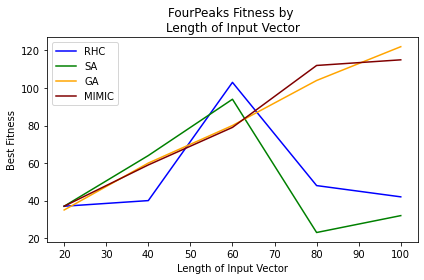

In [169]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FourPeaks Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Fitness.png")
plt.show()

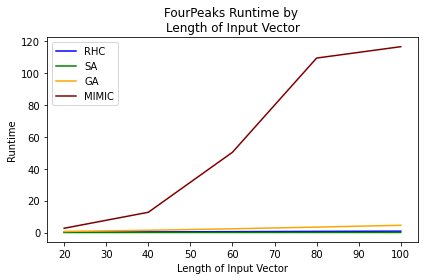

In [170]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FourPeaks Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Runtime.png")
plt.show()

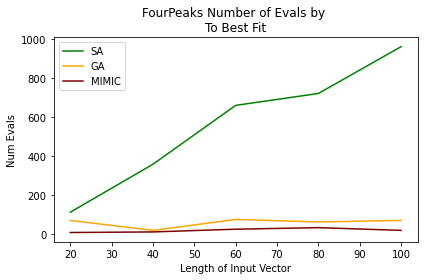

In [186]:
plt.clf()
#plt.plot(rhc_dict1['lengths'], rhc_dict1['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['num_evals_to_best'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Num Evals")
plt.title("FourPeaks Number of Evals by \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_NumEvals.png")
plt.show()

### FlipFlop - Highlights Strength of SA

In [172]:
LENGTHS = [20, 40, 60, 80, 100]

bf2_rhc_list = []
bf2_sa_list = []
bf2_ga_list = []
bf2_mim_list = []

rhc_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
sa_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
ga_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
mimic_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}

for i in range(0, len(LENGTHS)):
    
    length = LENGTHS[i]
    
    print("Trying Input Length", str(length))
    
    rhc_dict2['lengths'].append(length)
    sa_dict2['lengths'].append(length)
    ga_dict2['lengths'].append(length)
    mimic_dict2['lengths'].append(length)
    
    # Step 1
    fitness2 = mlrose.FlipFlop()
    
    # Step 2
    problem2 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness2, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs2_rhc, bf2_rhc, curve2_rhc = mlrose.random_hill_climb(problem = problem2, 
                                               max_attempts = 1000, max_iters = 100, 
                                               restarts = int(1.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict2['runtime'].append(end_rhc-start)
    rhc_dict2['best_fits'].append(bf2_rhc)
    rhc_dict2['fit_curves'].append(curve2_rhc)

    #arr1 = bf2_rhc.tolist()
    arr1 = np.array(bf2_rhc)
    arr1 = arr1.tolist()
    arr2 = list(curve2_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict2['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs2_sa, bf2_sa, curve2_sa = mlrose.simulated_annealing(problem=problem2, 
                                               max_attempts=100, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict2['runtime'].append(end_sa-end_rhc)
    sa_dict2['best_fits'].append(bf2_sa)
    sa_dict2['fit_curves'].append(curve2_sa)
    
    arr1 = np.array(bf2_sa)
    arr1 = arr1.tolist()
    arr2 = list(curve2_sa)
    num_evals = arr2.index(arr1) + 1
    sa_dict2['num_evals_to_best'].append(num_evals) 
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs2_ga, bf2_ga, curve2_ga = mlrose.genetic_alg(problem=problem2, 
                                               pop_size = int(2*length), mutation_prob = 0.20,
                                               max_attempts=1000, max_iters = 10,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict2['runtime'].append(end_ga-end_sa)
    ga_dict2['best_fits'].append(bf2_ga)
    ga_dict2['fit_curves'].append(curve2_ga)
    

    arr1 = np.array(bf2_ga)
    arr1 = arr1.tolist()
    arr2 = list(curve2_ga)
    num_evals = arr2.index(arr1) + 1
    ga_dict2['num_evals_to_best'].append(num_evals) 
    
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs2_mim, bf2_mim, curve2_mim = mlrose.mimic(problem=problem2, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    
    end_mimic = time.time()
    mimic_dict2['runtime'].append(end_mimic-end_ga)
    mimic_dict2['best_fits'].append(bf2_mim)
    mimic_dict2['fit_curves'].append(curve2_mim)
    
    arr1 = np.array(bf2_mim)
    arr1 = arr1.tolist()
    arr2 = list(curve2_mim)
    num_evals = arr2.index(arr1) + 1
    mimic_dict2['num_evals_to_best'].append(num_evals) 
   
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf2_rhc_list.append(bf2_rhc)
    bf2_sa_list.append(bf2_sa)
    bf2_ga_list.append(bf2_ga)
    bf2_mim_list.append(bf2_mim)
    

print(bf2_rhc_list)
print(bf2_sa_list)
print(bf2_ga_list)
print(bf2_mim_list)

Trying Input Length 20
...Finished RHC in 0.03669881820678711
...Finished SA in 0.0046291351318359375
...Finished GA in 0.03191113471984863
...Finished MIMIC in 2.5242958068847656
Trying Input Length 40
...Finished RHC in 0.08920598030090332
...Finished SA in 0.0285642147064209
...Finished GA in 0.06723785400390625


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 15.150748014450073
Trying Input Length 60
...Finished RHC in 0.1727461814880371
...Finished SA in 0.034494876861572266
...Finished GA in 0.12755417823791504
...Finished MIMIC in 37.70801568031311
Trying Input Length 80
...Finished RHC in 0.2804269790649414
...Finished SA in 0.04149603843688965
...Finished GA in 0.18603968620300293


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 70.0354232788086
Trying Input Length 100
...Finished RHC in 0.41222405433654785
...Finished SA in 0.04871392250061035


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.27837538719177246
...Finished MIMIC in 122.16511988639832
[18.0, 37.0, 54.0, 67.0, 81.0]
[19.0, 38.0, 54.0, 76.0, 92.0]
[16.0, 30.0, 42.0, 55.0, 69.0]
[19.0, 38.0, 55.0, 75.0, 93.0]


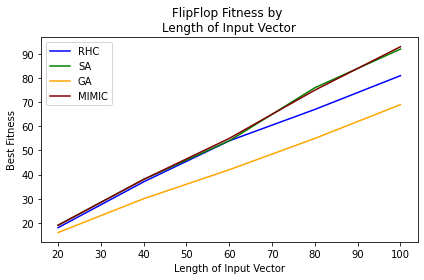

In [173]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FlipFlop Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Fitness.png")
plt.show()

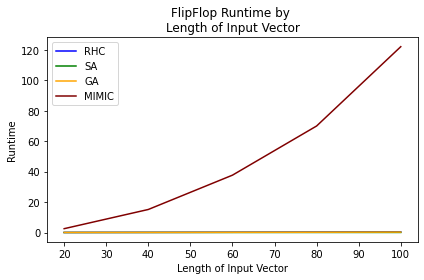

In [174]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FlipFlop Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Runtime.png")
plt.show()

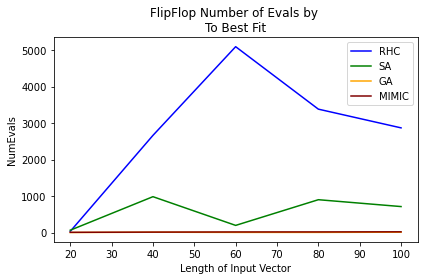

In [184]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['num_evals_to_best'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("NumEvals")
plt.title("FlipFlop Number of Evals by \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_NumEvals.png")
plt.show()

### Knapsack

In [176]:
LENGTHS = [20, 40, 60, 80, 100]

bf3_rhc_list = []
bf3_sa_list = []
bf3_ga_list = []
bf3_mim_list = []

rhc_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
sa_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
ga_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []}
mimic_dict3 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : [],
              'num_evals_to_best': []
              }

for i in range(0, len(LENGTHS)):
   
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict3['lengths'].append(length)
    sa_dict3['lengths'].append(length)
    ga_dict3['lengths'].append(length)
    mimic_dict3['lengths'].append(length)
    
    # Step 1
    random.seed(42)
    weights = []
    values = []

    for i in range(length):    
        weights.append(random.randint(1, 100))
        values.append(random.randint(1, 100))
        
    fitness3 = mlrose.Knapsack(weights=weights, values=values, max_weight_pct = 0.35)
    
    # Step 2
    problem3 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness3, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    start = time.time()
    bs3_rhc, bf3_rhc, curve3_rhc = mlrose.random_hill_climb(problem = problem3, 
                                               max_attempts = 100, max_iters = 1000, 
                                               restarts = int(2.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict3['runtime'].append(end_rhc-start)
    rhc_dict3['best_fits'].append(bf3_rhc)
    rhc_dict3['fit_curves'].append(curve3_rhc)
    
    arr1 = bf3_rhc.tolist()
    arr2 = list(curve3_rhc)
    num_evals = arr2.index(arr1) + 1
    rhc_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs3_sa, bf3_sa, curve3_sa = mlrose.simulated_annealing(problem=problem3, 
                                               max_attempts=1000, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict3['runtime'].append(end_sa-end_rhc)
    sa_dict3['best_fits'].append(bf3_sa)
    sa_dict3['fit_curves'].append(curve3_sa)
    
    arr3 = bf3_sa.tolist()
    arr4 = list(curve3_sa)
    num_evals = arr4.index(arr3) + 1
    sa_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs3_ga, bf3_ga, curve3_ga = mlrose.genetic_alg(problem=problem3, 
                                               pop_size = int(5*length), mutation_prob = 0.20,
                                               max_attempts=100, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict3['runtime'].append(end_ga-end_sa)
    ga_dict3['best_fits'].append(bf3_ga)
    ga_dict3['fit_curves'].append(curve3_ga)
    
    arr5 = bf3_ga.tolist()
    arr6 = list(curve3_ga)
    num_evals = arr6.index(arr5) + 1
    ga_dict3['num_evals_to_best'].append(num_evals)
    
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs3_mim, bf3_mim, curve3_mim = mlrose.mimic(problem=problem3, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    

    end_mimic = time.time()
    mimic_dict3['runtime'].append(end_mimic-end_ga)
    mimic_dict3['best_fits'].append(bf3_mim)
    mimic_dict3['fit_curves'].append(curve3_mim)
     
    arr7 = bf3_mim.tolist()
    arr8 = list(curve3_mim)
    num_evals = arr8.index(arr7) + 1
    mimic_dict3['num_evals_to_best'].append(num_evals)
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf3_rhc_list.append(bf3_rhc)
    bf3_sa_list.append(bf3_sa)
    bf3_ga_list.append(bf3_ga)
    bf3_mim_list.append(bf3_mim)
    

print(bf3_rhc_list)
print(bf3_sa_list)
print(bf3_ga_list)
print(bf3_mim_list)

Trying Input Length 20
...Finished RHC in 0.12604808807373047
...Finished SA in 0.03794980049133301
...Finished GA in 0.8148629665374756
...Finished MIMIC in 3.6846299171447754
Trying Input Length 40
...Finished RHC in 0.2763242721557617
...Finished SA in 0.04299187660217285

/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)



...Finished GA in 1.9110219478607178
...Finished MIMIC in 11.268703937530518
Trying Input Length 60
...Finished RHC in 0.42630577087402344
...Finished SA in 0.050675153732299805


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.2783761024475098
...Finished MIMIC in 61.645832777023315
Trying Input Length 80
...Finished RHC in 0.5954122543334961
...Finished SA in 0.062073707580566406


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 4.744328022003174
...Finished MIMIC in 34.64022397994995
Trying Input Length 100
...Finished RHC in 0.7975687980651855
...Finished SA in 0.07689785957336426


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 7.381639242172241
...Finished MIMIC in 52.75059103965759
[409.0, 953.0, 1396.0, 1759.0, 2392.0]
[390.0, 679.0, 1201.0, 1624.0, 2239.0]
[507.0, 1103.0, 1633.0, 2124.0, 2741.0]
[438.0, 970.0, 1512.0, 1984.0, 2497.0]


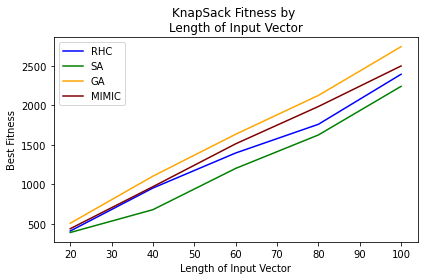

In [179]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("KnapSack Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_KnapSack_Fitness.png")
plt.show()

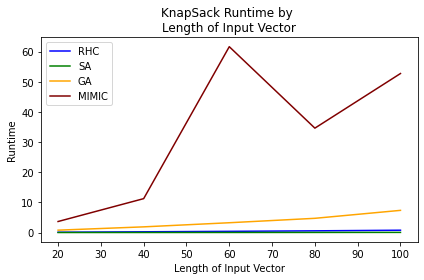

In [185]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['runtime'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("KnapSack Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_Knapsack_Runtime.png")
plt.show()

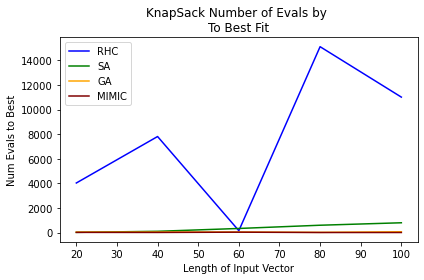

In [183]:
plt.clf()
plt.plot(rhc_dict3['lengths'], rhc_dict3['num_evals_to_best'], label = "RHC", color = 'blue')
plt.plot(sa_dict3['lengths'], sa_dict3['num_evals_to_best'], label = "SA", color = 'green')
plt.plot(ga_dict3['lengths'], ga_dict3['num_evals_to_best'], label = "GA", color = 'orange')
plt.plot(mimic_dict3['lengths'], mimic_dict3['num_evals_to_best'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Num Evals to Best")
plt.title("KnapSack Number of Evals by \nTo Best Fit")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_Knapsack_NumEvals.png")
plt.show()